In [1]:
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import transforms

sys.path.insert(0, '../..')
from load import load
from train import train, eval
from utils import plot_learningcurve, get_metrics
from dataset import psf_dataset, splitDataLoader, ToTensor, Normalize

In [2]:
model = models.inception_v3(pretrained=True, transform_input=False)

# Unsafe ?
first_conv_layer = [nn.ConvTranspose2d(2, 3, kernel_size=3, stride=3, padding=42, dilation=1, groups=1, bias=True),
                    model.Conv2d_1a_3x3]
model.Conv2d_1a_3x3= nn.Sequential(*first_conv_layer)

# Fit classifier
model.fc = nn.Linear(2048, 20)


# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
    model.to(device)

x = torch.randn(32, 2, 128, 128)
output, aux = model(x)
print(output.shape)

torch.Size([32, 20])


In [3]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-4)

In [4]:
# Data set
data_dir = '../../dataset/'
dataset_size = 10000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

In [ ]:
train(
      model, 
      dataset, 
      optimizer, 
      criterion,
      split = [0.9, 0.1],
      batch_size = 32,
      n_epoch = 300,
      random_seed = 42,
      model_dir = './',
      visdom = True,
      decay =  False
     )

Training started on cuda:0
Visdom successfully connected to server
[1/300] Train loss: 21188.558414 
[1/300] Validation loss: 20183.733643 
[1/300] Time: 67.386966 s
------------------------------
[2/300] Train loss: 19548.857366 
[2/300] Validation loss: 18117.770172 
[2/300] Time: 65.776735 s
------------------------------
[3/300] Train loss: 18125.448997 
[3/300] Validation loss: 16905.854095 
[3/300] Time: 65.368000 s
------------------------------
[4/300] Train loss: 16808.393527 
[4/300] Validation loss: 15547.673859 
[4/300] Time: 67.643877 s
------------------------------
[5/300] Train loss: 15554.087887 
[5/300] Validation loss: 13900.031311 
[5/300] Time: 66.952867 s
------------------------------
[6/300] Train loss: 14487.423565 
[6/300] Validation loss: 13553.339966 
[6/300] Time: 64.382095 s
------------------------------
[7/300] Train loss: 13479.573325 
[7/300] Validation loss: 12470.203949 
[7/300] Time: 67.682676 s
------------------------------
[8/300] Train loss: 126

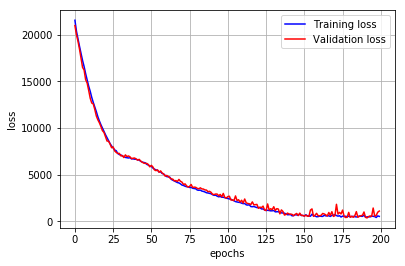

In [6]:
metrics = get_metrics()
plot_learningcurve(metrics)